# Line of Electrons going through a dipole 

first, let's:
## Generate the path

In [35]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

import xobjects as xo
import xtrack as xt

In [32]:
## Generate a simple line


elements_dir = {
    'drift_in': xt.Drift(length=0.05), # 5cm
    'dipole': xt.Multipole(knl=[2.0], length=1), # 20cm, k0=1.0
    'drift_out': xt.Drift(length=0.2), # 20cm
}

sequence = list(elements_dir.keys())
print(sequence)

elements = list(elements_dir.values())
print(elements)

line = xt.Line(elements=elements, element_names=sequence)

line.particle_ref = xt.Particles(p0c=1e9, #Energy of a typical particle which we'll shoot through
                                  q0=1, #Charge
                                    mass0=xt.PROTON_MASS_EV)
line.build_tracker()




['drift_in', 'dipole', 'drift_out']
[Drift(length=0.05), Multipole(_order=np.int64(0), inv_factorial_order=1, length=1, hxl=0, radiation_flag=np.int64(0), delta_taper=0, knl=array([2.]), ksl=array([0.]), _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0, _internal_record_id=RecordIdentifier(buffer_id=np.int64(0), offset=np.int64(0))), Drift(length=0.2)]


In [37]:
tw = line.twiss(
    method='4d',
    init=xt.TwissInit(
        x=0, px = 1, y = 0, py = 0,
    ),
    start='drift_in',
    end='drift_out'
)


/home/galeve/miniforge3/envs/xsuite-env/lib/python3.11/site-packages/xtrack/particles/particles.py:1380: RuntimeWarning: invalid value encountered in sqrt
  out = sqrt((1 + self.delta) ** 2 - self.kin_px ** 2 - self.kin_py ** 2)
/home/galeve/miniforge3/envs/xsuite-env/lib/python3.11/site-packages/xtrack/particles/particles.py:1388: RuntimeWarning: divide by zero encountered in divide
  out = self.kin_px / self.kin_ps
/home/galeve/miniforge3/envs/xsuite-env/lib/python3.11/site-packages/xtrack/particles/particles.py:1396: RuntimeWarning: invalid value encountered in divide
  out = self.kin_py / self.kin_ps


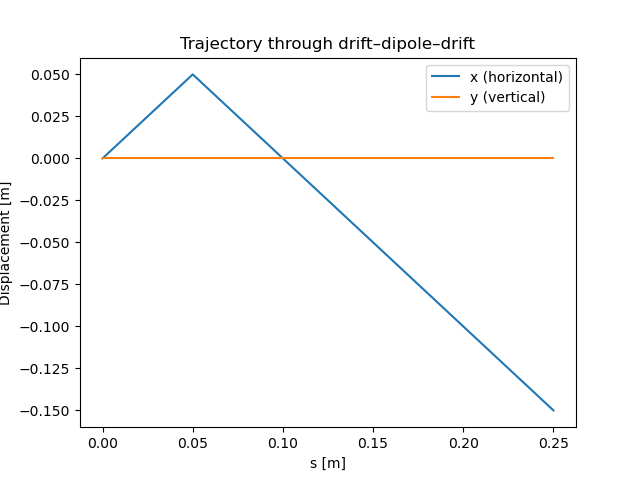

In [38]:

plt.figure()
plt.plot(tw['s'], tw['x'], label="x (horizontal)")
plt.plot(tw['s'], tw['y'], label="y (vertical)")
plt.xlabel("s [m]")
plt.ylabel("Displacement [m]")
plt.legend()
plt.title("Trajectory through drift–dipole–drift")
plt.show()